# Calculo del bandgap

In [11]:
using Plots
using DelimitedFiles
using Statistics

## Importación de los datos

Las primeras 12 filas son datos de la obtención de las medidas de transmitancia, por lo que no se tomaran en cuenta para los datos. La primera fila es la longitud de onda, y la tercera la transmitancia. Estas dos medidas son las que nos interesan para el cálculo del bandgap del material.

In [3]:
datos = readdlm("Equipo1S2.csv", ',', String, '\n')[12:end,:]
datos = parse.(Float64,datos);
#Longitud de onda
λ = datos[:,1]
#Transmitancia
T = datos[:,3]./100;

In [4]:
#Parametros

#Espesor del material
L = 80
#Constante de Planck
h = 4.135667696e-15 #(eV*s)
#Velocidad de la luz
c = 299792458e9 #(nm/s)

2.99792458e17

## Calculo de $\alpha h v$

### Hallando la absorbancia

Empleando el modelo de Bouger-Lambert.
$$I_{s} = I_{0}e^{-\alpha x}$$
En este caso x = L, es decir, el espesor de la película.
$$I_{s} = I_{0}e^{-\alpha L}$$
Dividiendo entre $I_{0}$ se obtiene la transmitancia.
$$\dfrac{I_{s}}{I_{0}} = T = e^{-\alpha L}$$
Despejando $\alpha$
$$\alpha = -\dfrac{\ln{T}}{L}$$

### Efectuando los cálculos

In [5]:
α = -log.(T)./L
v = c./λ

911-element Vector{Float64}:
 1.5778550421052632e15
 1.5695940209424085e15
 1.5614190520833332e15
 1.5533287979274612e15
 1.5453219484536082e15
 1.5373972205128205e15
 1.5295533571428572e15
 1.5217891269035532e15
 1.5141033232323232e15
 1.5064947638190955e15
 1.49896229e15
 1.4915047661691542e15
 1.4841210792079208e15
 ⋮
 2.7529151331496788e14
 2.7503895229357797e14
 2.747868542621448e14
 2.7453521794871794e14
 2.7428404208600184e14
 2.7403332541133456e14
 2.7378306666666666e14
 2.7353326459854016e14
 2.7328391795806747e14
 2.7303502550091075e14
 2.7278658598726116e14
 2.725385981818182e14

## Graficando

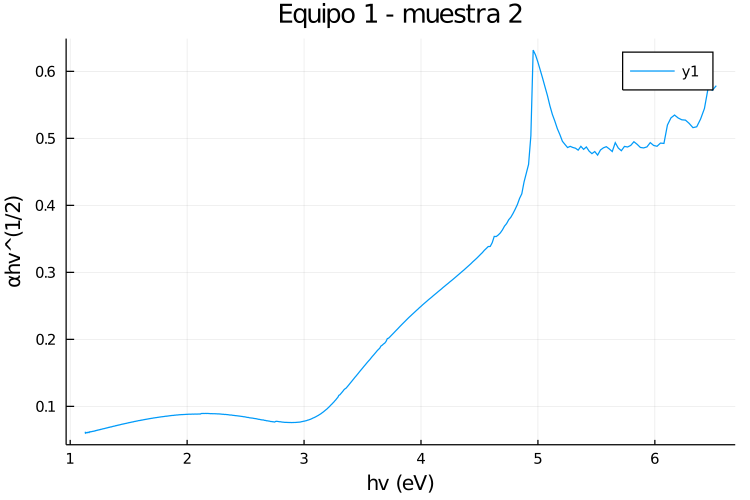

In [6]:
plot(h.*v,(α.*h.*v).^0.5,dpi=500,title="Equipo 1 - muestra 2",xlabel = "hv (eV)", ylabel = "αhv^(1/2)")

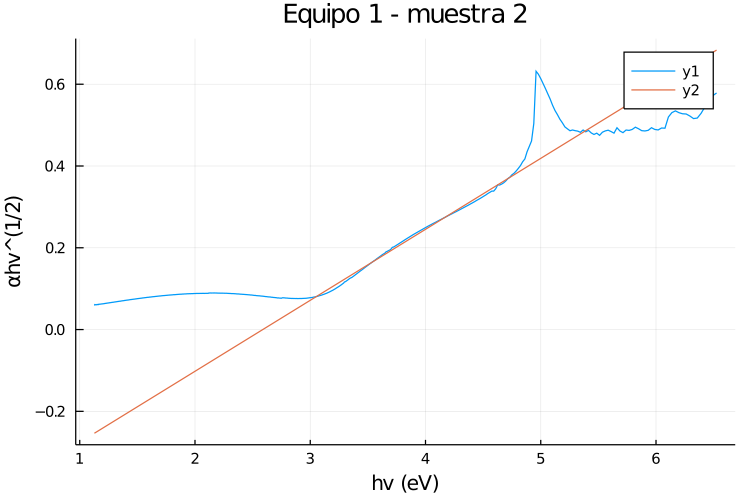

In [63]:
#Obteniendo la parte lineal
indices = (h.*v .> 3.3) .& (h.*v .< 4.5)
x = (h.*v)[indices]
y = ((α.*h.*v).^0.5)[indices]
#Realizando el ajuste lineal
n = sum(indices)
m = (sum(x.*y)-n*mean(x)*mean(y))/(sum(x.^2)-(sum(x))^2/n)
b = (sum(x.^2)*sum(y)-sum(x.*y)*sum(x))/(n*sum(x.^2)-(sum(x))^2)
#Graficando
plot(h.*v,(α.*h.*v).^0.5,dpi=500,title="Equipo 1 - muestra 2",xlabel = "hv (eV)", ylabel = "αhv^(1/2)")
plot!(h.*v[h.*v.+b.>0],m.*h.*v[h.*v.+b.>0].+b)